In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri artırma (data augmentation) işlemleri
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Train verilerini yükleme
train_generator = train_datagen.flow_from_directory(
    'C:\\Users\\mahmu\\JupyterNotebook\\chest_xray\\train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Validation verilerini yükleme
validation_generator = val_datagen.flow_from_directory(
    'C:\\Users\\mahmu\\JupyterNotebook\\chest_xray\\val',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Test verilerini yükleme
test_generator = test_datagen.flow_from_directory(
    'C:\\Users\\mahmu\\JupyterNotebook\\chest_xray\\test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 4803 images belonging to 2 classes.
Found 429 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


# Optimizatör ile öğrenme oranını belirleme
optimizer = Adam(learning_rate=1e-6)

# Modeli derleme
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [4]:
# Modeli eğitme
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
)

Epoch 1/30
151/151 [==============================] - 64s 406ms/step - loss: 0.5558 - accuracy: 0.7585 - val_loss: 0.7811 - val_accuracy: 0.5082
Epoch 2/30
151/151 [==============================] - 61s 404ms/step - loss: 0.5246 - accuracy: 0.7631 - val_loss: 0.7709 - val_accuracy: 0.5082
Epoch 3/30
151/151 [==============================] - 61s 402ms/step - loss: 0.4950 - accuracy: 0.7633 - val_loss: 0.6591 - val_accuracy: 0.5152
Epoch 4/30
151/151 [==============================] - 61s 401ms/step - loss: 0.4623 - accuracy: 0.7701 - val_loss: 0.6303 - val_accuracy: 0.5408
Epoch 5/30
151/151 [==============================] - 61s 403ms/step - loss: 0.4306 - accuracy: 0.7833 - val_loss: 0.5517 - val_accuracy: 0.6434
Epoch 6/30
151/151 [==============================] - 61s 401ms/step - loss: 0.3982 - accuracy: 0.8116 - val_loss: 0.5178 - val_accuracy: 0.7040
Epoch 7/30
151/151 [==============================] - 61s 401ms/step - loss: 0.3764 - accuracy: 0.8305 - val_loss: 0.4314 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


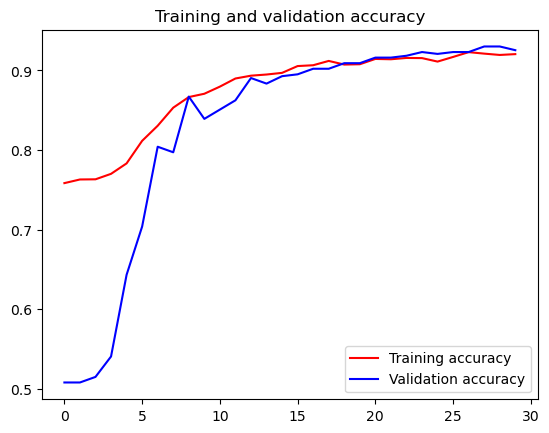

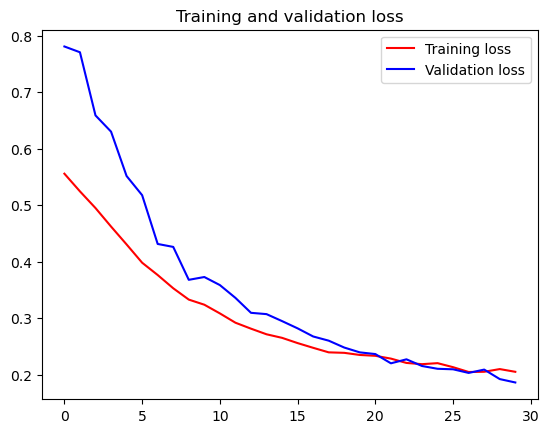

In [7]:
import matplotlib.pyplot as plt

# Eğitim geçmişi (history) içinde nelerin bulunduğunu kontrol etme
print(history.history.keys())

# Eğitim ve doğrulama metriklerini görselleştirme
acc = history.history['accuracy']
val_acc = history.history.get('val_accuracy')  # 'val_accuracy' anahtarını kontrol etme
loss = history.history['loss']
val_loss = history.history.get('val_loss')  # 'val_loss' anahtarını kontrol etme

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
if val_acc:
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
if val_loss:
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
# Modeli test etme
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

20/20 [==============================] - 5s 248ms/step - loss: 0.3103 - accuracy: 0.8670
Test Loss: 0.31028154492378235
Test Accuracy: 0.8669871687889099


In [9]:
# Modeli kaydetme
model.save('pneumonia_detection_model.h5')